In [ ]:
## 1. Transform data to record format
## First dataset from http://www.robots.ox.ac.uk/~vgg/data/scenetext/
## This method failed, because 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import math
import numpy as np
import scipy.io as sio
import gzip
from zipfile import ZipFile
import matplotlib.pyplot as plt
import cv2
import sys
sys.path.insert(0,'../')
sys.path.insert(0,'../processing/')
from datasets import sythtextprovider
import tensorflow as tf
import skimage.io as skio
#tf.InteractiveSession()
from PIL import Image
import re
import os
slim = tf.contrib.slim
tf.__version__
#from image_processing2 import *
from processing import txt_preprocessing
import tf_extended as tfe
from processing import tf_image
from nets import txtbox_300
import tf_utils
from nets import custom_layers
import load_batch

In [2]:
isess = tf.InteractiveSession()

file_path: ../data/ICDAR2013/*.tfrecord
[[3, 8, 46, 98, 166, 229], [5, 79, 5, 10, 0, 5], [36, 51, 87, 147, 210, 284], [66, 275, 176, 137, 200, 170]]


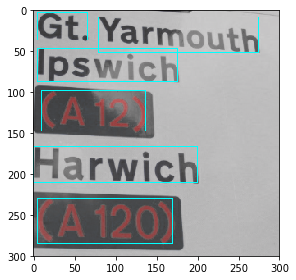

[[100, 106, 136, 161, 163], [171, 244, 188, 174, 214], [126, 126, 154, 181, 186], [236, 271, 253, 207, 269]]


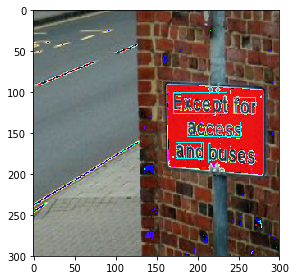

[[70], [222], [106], [346]]


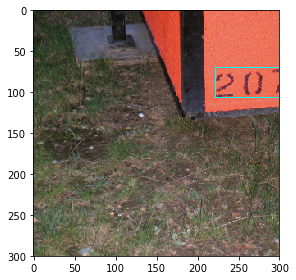

[[122, 106, 92], [214, 207, 222], [132, 115, 96], [242, 249, 243]]


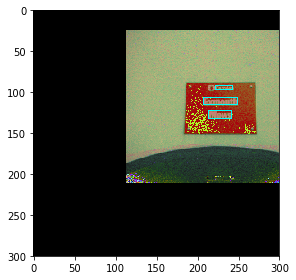

[[148, 270, 274, 274], [-31, -28, 110, 151], [250, 299, 300, 301], [337, 95, 136, 335]]


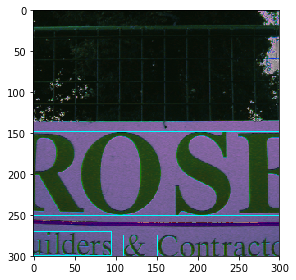

[[88, 98], [151, 143], [96, 110], [175, 180]]


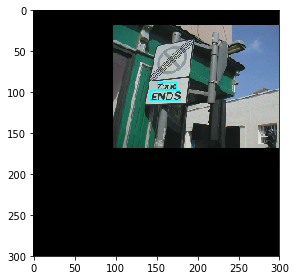

[[102, 101, 127, 127, 148], [9, 76, 9, 133, 104], [120, 120, 141, 140, 166], [55, 236, 122, 236, 162]]


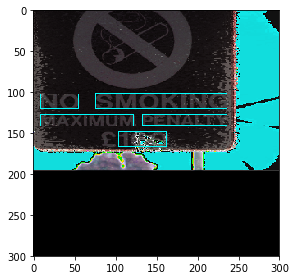

[[118, 130, 216, 268, 274], [143, 266, 142, 143, 215], [164, 175, 267, 310, 316], [258, 376, 338, 205, 308]]


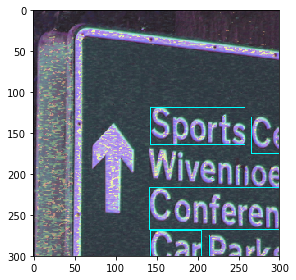

[[44, 127, 126, 130, 129, 129, 131], [143, 192, 205, 228, 245, 266, 287], [86, 135, 135, 136, 139, 137, 138], [288, 202, 223, 242, 262, 283, 309]]


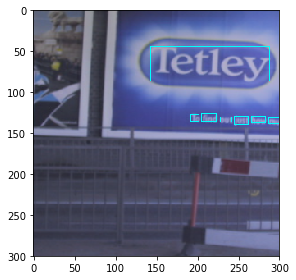

[[209, 210, 210, 223, 225], [167, 194, 226, 166, 232], [218, 221, 220, 237, 239], [192, 223, 254, 226, 268]]


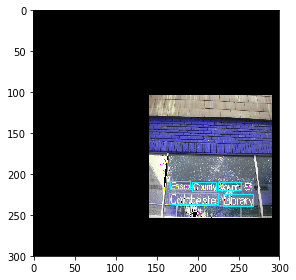

In [210]:
## test augmentation functions
#out_shape = [700,700]
with tf.Graph().as_default(): 
    dataset = sythtextprovider.get_datasets('../data/ICDAR2013/',file_pattern='*.tfrecord')
    
    data_provider = slim.dataset_data_provider.DatasetDataProvider(
            dataset, common_queue_capacity=4, common_queue_min=2)
    
    [image, shape, labels, bboxes, height, width] = \
    data_provider.get(['image', 'shape',
                     'object/label',
                     'object/bbox','height','width'])
    image_float = tf.to_float(image)/255.
    #image = tf_image.Random_Brightness(image)
    image = tf_image.distorter(image_float)
    image, bboxes = tf_image.resize_image_bboxes_with_crop_or_pad2(image, bboxes,height[0], width[0])
    image, labels, bboxes = tf_image.Random_crop(image, labels, bboxes)

    image = tf_image.resize_image(image, (300,300),
                                  method=tf.image.ResizeMethod.BILINEAR,
                                  align_corners=False)
    
    
    
    
    
    with tf.Session() as sess: 
        sess.run(tf.global_variables_initializer())
        with slim.queues.QueueRunners(sess):
            for i in xrange(10):
                image_,bboxes_= \
                    sess.run([image,bboxes])
                image_ = image_ * 255.
                image_ = image_.astype(np.uint8)
                #skio.imshow(image_)
                #skio.show()
                visualize_bbox(image_, bboxes_)

                
                

In [22]:
np.linspace(0,1.,21).shape


(21,)

file_path: ../data/sythtext/*.tfrecord
155.485 -87.0282
(300, 300, 3)
150.667 -120.0
[[0], [138], [43], [300]]


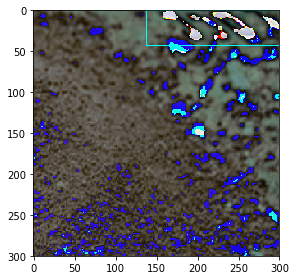

181.479 -164.465
(300, 300, 3)
150.667 -123.0
[[225, 77], [0, 124], [300, 135], [279, 184]]


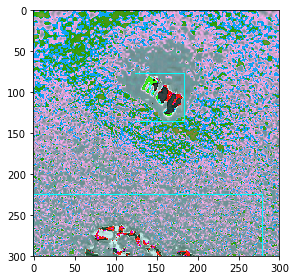

123.008 -94.4596
(300, 300, 3)
150.667 -123.0
[[0, 59], [275, 84], [8, 105], [300, 147]]


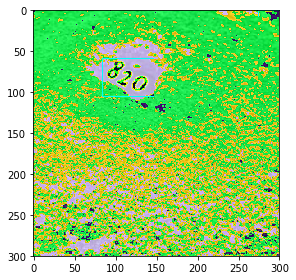

143.091 -123.0
(300, 300, 3)
150.667 -122.333
[[0, 73], [191, 110], [19, 105], [284, 136]]


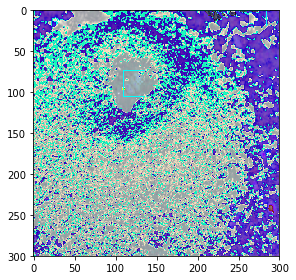

129.767 -107.536
(300, 300, 3)
150.667 -120.167
[[0, 0, 243, 64, 87, 11], [258, 210, 0, 133, 137, 0], [14, 25, 275, 92, 120, 31], [300, 264, 26, 159, 170, 59]]


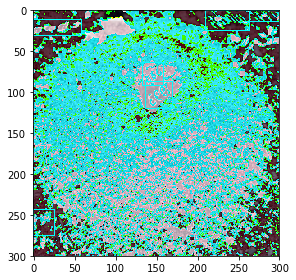

138.007 -123.0
(300, 300, 3)
150.667 -123.0
[[110], [106], [154], [148]]


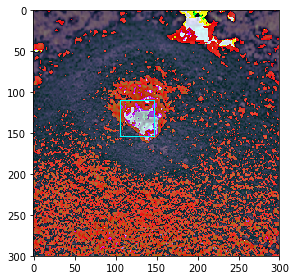

151.002 -123.0
(300, 300, 3)
150.667 -123.0
[[188, 132, 264, 234], [8, 29, 91, 188], [231, 223, 299, 298], [66, 146, 199, 300]]


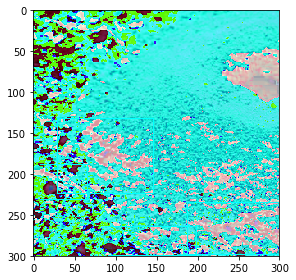

69.3046 -118.245
(300, 300, 3)
150.667 -122.5
[[0, 197, 151], [77, 132, 38], [43, 300, 278], [256, 294, 178]]


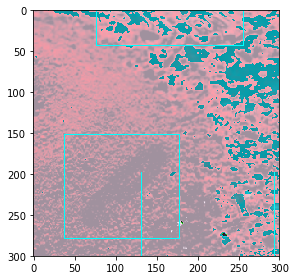

150.966 -123.0
(300, 300, 3)
150.667 -123.0
[[232, 251, 0, 1, 17], [261, 261, 0, 196, 195], [253, 277, 300, 17, 35], [300, 300, 274, 274, 266]]


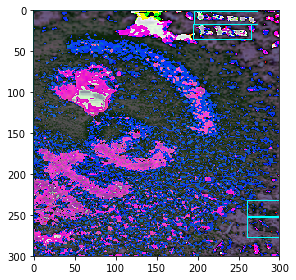

57.7326 -98.1027
(300, 300, 3)
150.667 -118.167
[[217, 242, 17], [282, 281, 120], [243, 276, 70], [300, 300, 165]]


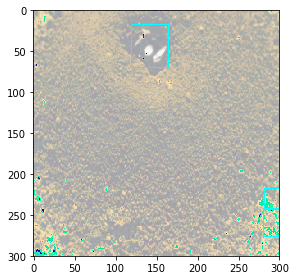

107.794 -94.1968
(300, 300, 3)
150.667 -120.0
[[0, 79], [0, 0], [80, 263], [187, 67]]


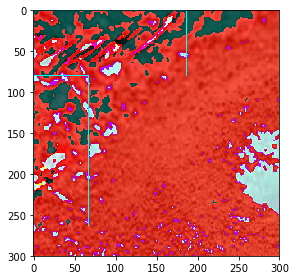

92.667 -63.9716
(300, 300, 3)
150.667 -120.0
[[11, 10], [282, 230], [32, 36], [300, 297]]


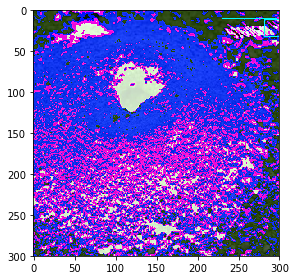

384.444 -10335.7
(300, 300, 3)
151.0 -119.833
[[90, 132, 158, 187, 163, 202, 100], [162, 114, 173, 129, 82, 41, 46], [102, 152, 198, 245, 241, 214, 109], [193, 131, 205, 174, 142, 64, 75]]


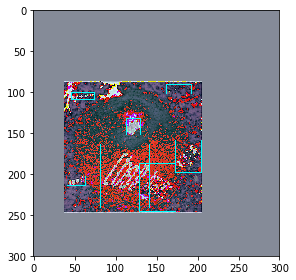

90.3098 -96.7079
(300, 300, 3)
150.667 -113.833
[[231, 89], [270, 139], [265, 121], [300, 168]]


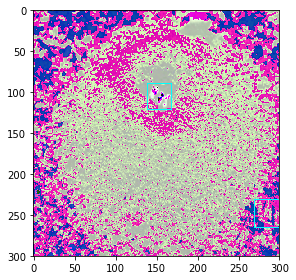

151.0 -123.0
(300, 300, 3)
150.667 -120.0
[[5, 53], [168, 161], [34, 150], [300, 274]]


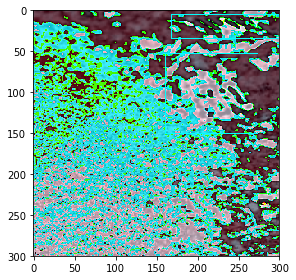

5120.36 -315657.0
(300, 300, 3)
150.667 -116.5
[[94, 240, 271, 74], [24, 248, 247, 48], [135, 269, 300, 104], [78, 300, 300, 84]]


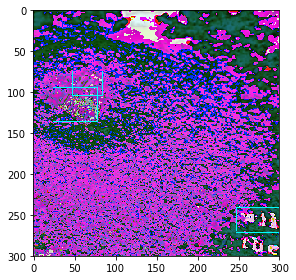

150.745 -123.0
(300, 300, 3)
150.667 -120.333
[[0, 24, 263, 86], [16, 236, 275, 121], [37, 49, 289, 130], [73, 293, 300, 162]]


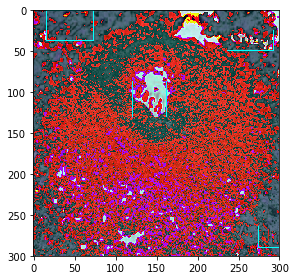

150.667 -123.0
(300, 300, 3)
150.667 -123.0
[[6, 157, 223, 87, 68], [197, 183, 8, 137, 137], [34, 236, 250, 115, 95], [286, 242, 42, 162, 158]]


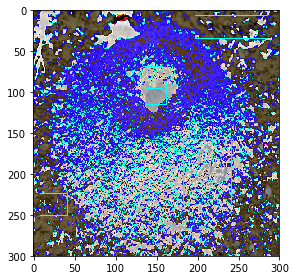

144.491 -73.6689
(300, 300, 3)
150.667 -120.0
[[246], [0], [300], [111]]


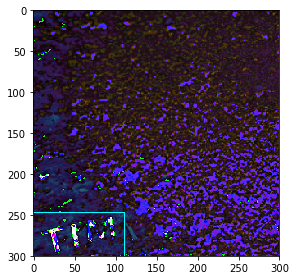

111.078 -141.382
(300, 300, 3)
150.667 -123.0
[[282, 122, 115, 170, 268, 103, 103], [46, 32, 291, 173, 35, 254, 218], [300, 140, 131, 193, 287, 130, 134], [77, 85, 300, 198, 71, 291, 257]]


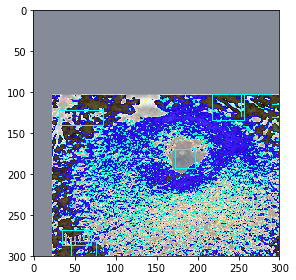

In [212]:
#out_shape = [700,700]
with tf.Graph().as_default(): 
    # build a net
    text_net = txtbox_300.TextboxNet()
    text_shape = text_net.params.img_shape
    #print 'text_shape ' +  str(text_shape)
    text_anchors = text_net.anchors(text_shape)
    
    ## dataset provider
    dataset = sythtextprovider.get_datasets('../data/sythtext/',file_pattern='*.tfrecord')
    
    data_provider = slim.dataset_data_provider.DatasetDataProvider(
            dataset, common_queue_capacity=32, common_queue_min=2)
    
    [image, shape, glabels, gbboxes,height,width] = \
    data_provider.get(['image', 'shape',
                     'object/label',
                     'object/bbox','height','width'])

    
    image_train, tlabels, tbboxes,num = \
        txt_preprocessing.preprocess_image(image,  glabels,gbboxes,height,width,
                                        [300,300],data_format = 'NHWC', is_training=True)
    image_test, elabels, ebboxes, bbox_img,num = \
        txt_preprocessing.preprocess_image(image,  glabels,gbboxes, height, width,
                                        [300,300],data_format = 'NHWC',is_training=False)
    batch_image = slim.batch_norm(image_train)
    #scala_image = tf.cast(image_train, tf.uint8)
    
    
    with tf.Session() as sess: 
        sess.run(tf.global_variables_initializer())
        with slim.queues.QueueRunners(sess):
            for i in xrange(20):
                image_, batch_image_,image_test_,bbox_,test_box= sess.run([image_train,batch_image,image_test,tbboxes,ebboxes])
                #image_ = image_*255
                print image_.max(),image_.min()
                print image_.shape
                print image_test_.max(), image_test_.min()
                #image_ = image_ * 255.
                image_ = image_.astype(np.uint8)
                visualize_bbox(image_, bbox_)
                #image_test_ = image_test_ * 255.
                #image_test_ = image_test_.astype(np.uint8)
                #visualize_bbox(image_test_, test_box)
                
                

In [275]:
text_net = txtbox_300.TextboxNet()
text_shape = text_net.params.img_shape
#print 'text_shape ' +  str(text_shape)
text_anchors = text_net.anchors(text_shape)
yref, xref, href, wref = text_anchors[0]
i = 1
j = 0
ymin = np.reshape(yref[19:20,19,0,:] - href / 2., -1)
xmin = np.reshape(xref[19:20,19,0,:] - wref / 2., -1)
ymax = np.reshape(yref[19:20,19,0,:] + href / 2., -1)
xmax = np.reshape(xref[19:20,19,0,:] + wref / 2., -1)
print ymax - ymin

[ 0.10000002  0.07071066  0.05773506  0.04472136  0.03779647  0.03333333
  0.02499998]


In [276]:
test = np.array([171,114,177,155])/300.

(7,)
(8, 4)
[[138, 143, 145, 147, 148, 148, 150, 170], [138, 132, 127, 120, 114, 129, 146, 114], [168, 164, 162, 160, 159, 158, 157, 177], [168, 175, 179, 187, 193, 177, 161, 155]]


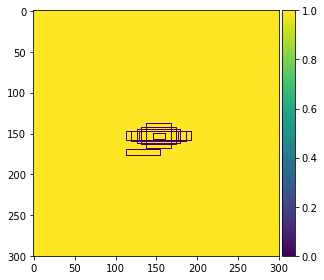

In [277]:
#bbox = np.stack([ymin[19*19:19*19+13],xmin[19*19:19*19+13],ymax[19*19:19*19+13],xmax[19*19:19*19+13]], 1)
print ymin.shape
bbox = np.stack([ymin, xmin, ymax, xmax],1)
bbox = np.concatenate([bbox,np.expand_dims(test,0)],0)
print bbox.shape
image = np.ones((300,300),np.uint8)
image.shape
visualize_bbox(image, bbox)

In [208]:
def visualize_bbox(image, bboxes):
    """
    Input: image (height, width, channels)
           bboxes (numof bboxes, 4) in order(ymin, xmin, ymax, xmax)
                  range(0,1) 
    """
    numofbox = bboxes.shape[0]
    width = image.shape[1]
    height = image.shape[0]
    def norm(x):
        if x < 0:
            x = 0
        else:
            if x > 1:
                x = 1
        return x
    xmin = [int(i * width) for i in bboxes[:,1]]
    ymin = [int(i * height) for i in bboxes[:,0]]
    ymax = [int(i * height) for i in bboxes[:,2]]
    xmax = [int(i * width) for i in bboxes[:,3]]

    for i in range(numofbox):
        image = cv2.rectangle(image,(xmin[i],ymin[i]),
                             (xmax[i],ymax[i]),(0,255,255),thickness=1)
    print [ymin,xmin,ymax,xmax]
    skio.imshow(image)
    skio.show()

In [ ]:
image = np.random.randint(255, size=(4, 5, 3)).astype(np.uint8)
print image/255.
#image_tensor = tf.image.encode_jpeg(tf.constant(image))
image_tensor = tf.to_float(tf.constant(image))/255.
image_tensor = tf.transpose(image_tensor, perm=[2,0,1])
image_tensor = tf.random_shuffle(image_tensor)
image_tensor = tf.transpose(image_tensor, perm=[1,2,0])
image_tensor.eval()

In [ ]:
height, width, channel = image_tensor.get_shape()
print height